# References:

1. [Syntax](https://www.neuron.yale.edu/neuron/static/new_doc/programming/hocsyntax.html)
2. [Python docs for Neuron](https://www.neuron.yale.edu/neuron/static/new_doc/programming/python.html)
3. [More Python docs](https://www.neuron.yale.edu/neuron/static/py_doc/programming/python.html)
4. [GeeksForGeeks Single Neural net](https://www.geeksforgeeks.org/single-neuron-neural-network-python/)
5. [Freeman K-Sets github](https://github.com/piazentin/ksets)
6. AP - https://www.moleculardevices.com/applications/patch-clamp-electrophysiology/what-action-potential#gref
7. https://www.neuron.yale.edu/neuron/static/py_doc/modelspec/programmatic/network/netcon.html
8. http://neupy.com/apidocs/neupy.algorithms.associative.hebb.html
9. https://qbi-software.github.io/NEURON-tutorial/lessons/network
10. https://www.neuron.yale.edu/neuron/static/py_doc/modelspec/programmatic/topology/geometry.html
11. http://www.cnel.ufl.edu/courses/EEL6814/chapter6.pdf
12. https://www.slideshare.net/mentelibre/hebbian-learning
13. http://www.diva-portal.org/smash/get/diva2:1089220/FULLTEXT02
14. [Use this for ExpSyn tau](https://www.neuron.yale.edu/neuron/static/py_doc/modelspec/programmatic/mechanisms/mech.html#ExpSyn)

## Doubts for 4-coupled
- [Negative weights for NetCon](https://www.neuron.yale.edu/phpBB/viewtopic.php?t=3306)
- [Excitatory conductances](https://www.neuron.yale.edu/phpBB/viewtopic.php?t=4415)

<h2> Stage 0: Adjust this Jupyter notebook for Colab</h2>

In [ ]:
!pip3 install neuron matplotlib seaborn bokeh neuron

     |████████████████████████████████| 12.6 MB 5.8 MB/s 


### Stage 1: Import the required libraries

In [ ]:
from neuron import h                     #.h is a HOC object instance & gui from neuron can also be imported 
from neuron.units import ms,mV
h.load_file('stdrun.hoc')                #Allows us to do a high level simulation

import random  

%matplotlib notebook
import matplotlib.pyplot as plt1

from bokeh.io import output_notebook
import bokeh.plotting as plt2
output_notebook()

import seaborn as sns
# size=int(input('Enter no.of sets  ')
# size=2

In [ ]:
#Seeing all methods and variables available for h
# dir(h)

### Stage 2: Make the Mcell and Gcell with the specific properties

In [ ]:
#This class makes one Mcell neuron(soma,axon,dendrite)
class MCELL:
    def __init__(self, gid, M):
        self._gid = gid #Neuron no.
        self.M = M+1
        #Setting morphology
        #Creating soma,dend and axon
        self.soma=h.Section(name='soma',cell=self)
        self.dend=h.Section(name='dend',cell=self)
        self.axon=h.Section(name='axon',cell=self)
        
        self.all = [self.axon, self.soma, self.dend] 
        #list of all the sections in the cell.
        #We could explicitly specify the connection location  by self.dend.connect(self.soma(0.5))
        
        self.dend.connect(self.soma,1,0)
        self.axon.connect(self.soma,0,0)
        
        self._spike_detector = h.NetCon(self.soma(0.5)._ref_v, None, sec=self.soma)
        self.spike_times = h.Vector()
        self._spike_detector.record(self.spike_times)
        self.soma_v = h.Vector().record(self.soma(0.5)._ref_v)
        self._ncs = [] 
        
        #Defining geometry of soma
        self.soma.L = self.soma.diam = 18.8 #in microns
        self.soma.nseg = 1                  #No. of segments
        
        #Defining geometry of dend
        self.dend.nseg = 1                  #No. of segments
        self.dend.L = 709.3               #in microns
        self.dend.diam = 3.18               #in microns
        self.dendexcisyn = h.ExpSyn(self.dend(0.5))
        self.dendexcisyn.tau = 1 *ms
        self.dendexcisyn.e = 0 
        self.dendinhisyn = h.ExpSyn(self.dend(0.1))
        self.dendinhisyn.tau = 7
        self.dendinhisyn.e = -70
        
        #Defining geometry for axon
        self.axon.nseg = 1
        self.axon.L = 152
        self.axon.diam = 2.18
        self.axonexcisyn = h.ExpSyn(self.axon(0.5))
        self.axonexcisyn.tau = 1 #Decay time constant
        self.axonexcisyn.e = 0 #Reversal potential
        self.axoninhisyn = h.ExpSyn(self.axon(0.1))
        self.axoninhisyn.tau = 7
        self.axoninhisyn.e = -70
        
        #Setting biophysics
        for sec in self.all:                                                  
            sec.Ra = 123    # Axial resistance in Ohm * cm                    
            sec.cm = 1      # Membrane capacitance in micro Farads / cm^2
        
        self.soma.insert('hh')            #Inserting HH neurons
        self.axon.insert('hh')
        self.dend.insert('pas')
        for seg in self.dend:                               
            seg.pas.g = 0.001  # Passive conductance in S/cm2 
            seg.pas.e = -78    # Leak reversal potential mV
        
    def __repr__(self):
        return 'Set [{}]_Mcell [{}]'.format(self.M,self._gid)
        #This shows how to represent each part when called upon

In [ ]:
#This class makes one Gcell neuron(soma,axon,dendrite)
class GCELL:
    def __init__(self, gid, M):
        self._gid = gid #Neuron no.
        self.M = M+1
        #Setting morphology
        #Creating soma,dend and axon
        self.soma=h.Section(name='soma',cell=self)
        self.dend=h.Section(name='dend',cell=self)
        self.axon=h.Section(name='axon',cell=self)
        
        self.all = [self.axon, self.soma, self.dend] 
        #list of all the sections in the cell.
        #We could explicitly specify the connection location  by self.dend.connect(self.soma(0.5))
        
        self.dend.connect(self.soma,1,0)
        self.axon.connect(self.soma,0,0)
        
        self._spike_detector = h.NetCon(self.soma(0.5)._ref_v, None, sec=self.soma)
        self.spike_times = h.Vector()
        self._spike_detector.record(self.spike_times)
        self.soma_v = h.Vector().record(self.soma(0.5)._ref_v)
        self._ncs = [] 
        
        #Defining geometry of soma
        self.soma.L = self.soma.diam = 30 #in microns
        self.soma.nseg = 1                  #No. of segments
        
        #Defining geometry of dend
        self.dend.nseg = 1                  #No. of segments
        self.dend.L = 100                 #in microns
        self.dend.diam = 3.18                #in microns
        self.dendexcisyn = h.ExpSyn(self.dend(0.8))
        self.dendexcisyn.tau = 2 *ms
        self.dendexcisyn.e = 0 
        self.dendinhisyn = h.ExpSyn(self.dend(0.1))
        self.dendinhisyn.tau = 8
        self.dendinhisyn.e = -70
        
        #Defining geometry for axon
        self.axon.nseg = 1
        self.axon.L = 100
        self.axon.diam = 2.18
        self.axonexcisyn = h.ExpSyn(self.axon(0.8))
        self.axonexcisyn.tau = 2 #Decay time constant
        self.axonexcisyn.e = 0 #Reversal potential
        self.axoninhisyn = h.ExpSyn(self.axon(0.1))
        self.axoninhisyn.tau = 8
        self.axoninhisyn.e = -70
        
        #Setting biophysics
        for sec in self.all:                                                  
            sec.Ra = 100    # Axial resistance in Ohm * cm                    
            sec.cm = 1      # Membrane capacitance in micro Farads / cm^2
        
        self.soma.insert('hh')            #Inserting HH neurons
        self.axon.insert('hh')
        self.dend.insert('pas')
        for seg in self.dend:                               
            seg.pas.g = 0.001  # Passive conductance in S/cm2 
            seg.pas.e = -78    # Leak reversal potential mV
        
    def __repr__(self):
        return 'Set [{}]_Gcell [{}]'.format(self.M,self._gid)
        #This shows how to represent each part when called upon

### Stage 3: Import random weights
We import the random weights as intitally the weights of the neurons are not adjusted to fire synchronously.

In [ ]:
import numpy as np

# start_weights = np.random.poisson(lam=1000, size=(1,6))/10000

#uniform distribution
low, high = 0.5, 1
uniform_distribution = np.random.uniform(low, high,2*5-1)


#wMM = random.uniform(0,1)
#wMG = random.uniform(0,1)
#wGM = random.uniform(0,1)
#wGG = random.uniform(0,1)
#wMML = random.uniform(0,1)
#wGGL = random.uniform(0,1)

s1= [4.6, 2.1, 4.5, 1.3, 1.5, 2.6]
s2= [1.3, 1.4, 2.0, 2.0, 0.001, 0.001] 
#s3 = [wMM,wMG,wGM,wGG,wMML,wGGL]
weights = uniform_distribution

print(weights)

[0.77061694 0.86581345 0.59501333 0.57298996 0.87392283 0.65748921
 0.69320168 0.58028436 0.83525883]


### Stage 4: Couple Mcell and Gcell according to Freeman's KII Set with the weights generated above

In [ ]:
#Gives one 4 coupled neuron using freeman's topology in olfactory bulb
import random
import math
class CONNECTING:
    """Coupling neurons
    """
    def __init__(self,M,weights,delay1=0,delay2=2,delay3=4,delay4=6):
        wMM=weights[0]
        wMG=weights[1]
        wGM=weights[2]
        wGG=weights[3]
        
        self.M = M #Set no.
        self.th = -70 #halting time
        self.maindelay = 5
        #self.syns = []
        #self.netcons = []
        
        #Making 4 neurons
        self.cells=[]

        self.M1=MCELL(1,self.M)
        self.M2=MCELL(2,self.M)
        self.G1=GCELL(3,self.M)
        self.G2=GCELL(4,self.M)
        self.cells.append(self.M1)
        self.cells.append(self.M2)
        self.cells.append(self.G1)
        self.cells.append(self.G2)
        
        #Giving current pulse
        #rand_num = math.round(random.randint(0,1))
#         rand_num = abs(math.floor(random.randint(-1,1)))
        self.stim = h.IClamp(0.9, sec=self.M1.dend)
        self.stim.delay = self.maindelay   #in ms
        self.stim.dur = 100     #in ms
        self.stim.amp = 0.8  #in nA
#         print(rand_num)
        

         #Connecting M1 to M2
        self.nc1 = h.NetCon(getattr(self.M1.soma(0.5), '_ref_v'),self.M2.dendexcisyn,sec=self.M1.soma)
        self.nc1.weight[0] = wMM
        self.nc1.delay = delay1+self.maindelay #tm1m2
        self.nc1.threshold = self.th
      
         #Connecting M2 to M1
        self.nc2 = h.NetCon(getattr(self.M2.soma(0.5), '_ref_v'),self.M1.dendexcisyn,sec=self.M2.soma)
        self.nc2.weight[0] = wMM
        self.nc2.delay = delay2+self.maindelay #tm2m1
        self.nc2.threshold = self.th
        
         #Connecting M2 to G1
        self.nc3 = h.NetCon(getattr(self.M2.soma(0.5), '_ref_v'),self.G1.dendexcisyn,sec=self.M2.soma)
        self.nc3.weight[0] = wMG
        self.nc3.delay = delay2+self.maindelay #tm2g1
        self.nc3.threshold = self.th
        
         #Connecting G1 to M2
        self.nc4 = h.NetCon(getattr(self.G1.soma(0.5), '_ref_v'),self.M2.dendinhisyn,sec=self.G1.soma)
        self.nc4.weight[0] = wGM
        self.nc4.delay = delay3+self.maindelay
        self.nc4.threshold = self.th
        
         #Connecting G1 to G2
        self.nc5 = h.NetCon(getattr(self.G1.soma(0.5), '_ref_v'),self.G2.dendinhisyn,sec=self.G1.soma)
        self.nc5.weight[0] = wGG
        self.nc5.delay = delay3+self.maindelay
        self.nc5.threshold = self.th
        
         #Connecting G2 to G1
        self.nc6 = h.NetCon(getattr(self.G2.soma(0.5), '_ref_v'),self.G1.dendinhisyn,sec=self.G2.soma)
        self.nc6.weight[0] = wGG
        self.nc6.delay = delay4+self.maindelay
        self.nc6.threshold = self.th
        
         #Connecting G2 to M1
        self.nc7 = h.NetCon(getattr(self.G2.soma(0.5), '_ref_v'),self.M1.dendinhisyn,sec=self.G2.soma)
        self.nc7.weight[0] = wGM
        self.nc7.delay = delay4+self.maindelay
        self.nc7.threshold = self.th
        
         #Connecting M1 to G2
        self.nc8 = h.NetCon(getattr(self.M1.soma(0.5), '_ref_v'),self.G2.dendexcisyn,sec=self.M1.soma)
        self.nc8.weight[0] = wMG
        self.nc8.delay = delay1+self.maindelay
        self.nc8.threshold = self.th
        
        #Connecting M1 to G1
        self.nc9 = h.NetCon(getattr(self.M1.soma(0.5), '_ref_v'),self.G1.dendexcisyn,sec=self.M1.soma)
        self.nc9.weight[0] = wMG
        self.nc9.delay = delay1+self.maindelay
        self.nc9.threshold = self.th
        
        #Connecting G1 to M1
        self.nc10 = h.NetCon(getattr(self.G1.soma(0.5), '_ref_v'),self.M1.dendinhisyn,sec=self.G1.soma)
        self.nc10.weight[0] = wGM
        self.nc10.delay = delay3+self.maindelay
        self.nc10.threshold = self.th

### Stage 5: Laterally connect each set of 4 coupled neurons according to Freeman's KII Set

In [ ]:
class LATERAL:
    """Laterally coupling N-4 coupled neurons
    """
    def __init__(self,N,weights):
        wMML=weights[4]
        wGGL=weights[5]
        
        self.N = N
        self.th = -70
        self.maindelay = 5
        self.sets = []
        for i in range(N):
            self.sets.append(CONNECTING(i,weights))
        
        for r in range(1,N-1):
            for j in range(N-r):
                #Connecting M1[0] to M1[1]
                exec(f"self.nc11_{j} = h.NetCon(getattr(self.sets[j].M1.soma(0.5), '_ref_v'), self.sets[j+r].M1.dendexcisyn,sec=self.sets[j].M1.soma)")
                exec(f"self.nc11_{j}.weight[0] = wMML")
                exec(f"self.nc11_{j}.delay = self.maindelay+1")
                exec(f"self.nc11_{j}.threshold = self.th")

                #Connecting M1[1] to M1[0]
                exec(f"self.nc12_{j} = h.NetCon(getattr(self.sets[j+r].M1.soma(0.5), '_ref_v'), self.sets[j].M1.dendexcisyn,sec=self.sets[j+r].M1.soma)")
                exec(f"self.nc12_{j}.weight[0] = wMML")
                exec(f"self.nc12_{j}.delay = self.maindelay+3")
                exec(f"self.nc12_{j}.threshold = self.th")

                #Connecting G1[0] to G1[1]
                exec(f"self.nc13_{j} = h.NetCon(getattr(self.sets[j].G1.soma(0.5), '_ref_v'), self.sets[j+r].G1.dendinhisyn,sec=self.sets[j].G1.soma)")
                exec(f"self.nc13_{j}.weight[0] = wGGL")
                exec(f"self.nc13_{j}.delay = self.maindelay+5")
                exec(f"self.nc13_{j}.threshold = self.th")

                #Connecting G1[1] to G1[0]
                exec(f"self.nc14_{j} = h.NetCon(getattr(self.sets[j+r].G1.soma(0.5), '_ref_v'), self.sets[j].G1.dendinhisyn,sec=self.sets[j+r].G1.soma)")
                exec(f"self.nc14_{j}.weight[0] = wGGL")
                exec(f"self.nc14_{j}.delay = self.maindelay+7")
                exec(f"self.nc14_{j}.threshold = self.th")

### Stage 6: Input the number of 4 coupled sets required (which are all laterally connected)

In [ ]:
#Give N value to get N no. of 4 coupled neurons laterally connected
#given_input_from_user = int(input('Enter the number of 4 coupled sets required: '))
given_input_from_user= 5
print(weights)
L1=LATERAL(given_input_from_user,weights)

[0.77061694 0.86581345 0.59501333 0.57298996 0.87392283 0.65748921
 0.69320168 0.58028436 0.83525883]


### Stage 7: Visualize the topology of the neurons and the 3D space they are in. Also visualize the density mechanisms added to each neuron of a set.

In [ ]:
h.topology()
#import pdb; pdb.set_trace()
#h.Shape()


|-|       Set [1]_Mcell [1].soma(0-1)
   `|       Set [1]_Mcell [1].dend(0-1)
 `|       Set [1]_Mcell [1].axon(0-1)
|-|       Set [1]_Mcell [2].soma(0-1)
   `|       Set [1]_Mcell [2].dend(0-1)
 `|       Set [1]_Mcell [2].axon(0-1)
|-|       Set [1]_Gcell [3].soma(0-1)
   `|       Set [1]_Gcell [3].dend(0-1)
 `|       Set [1]_Gcell [3].axon(0-1)
|-|       Set [1]_Gcell [4].soma(0-1)
   `|       Set [1]_Gcell [4].dend(0-1)
 `|       Set [1]_Gcell [4].axon(0-1)
|-|       Set [2]_Mcell [1].soma(0-1)
   `|       Set [2]_Mcell [1].dend(0-1)
 `|       Set [2]_Mcell [1].axon(0-1)
|-|       Set [2]_Mcell [2].soma(0-1)
   `|       Set [2]_Mcell [2].dend(0-1)
 `|       Set [2]_Mcell [2].axon(0-1)
|-|       Set [2]_Gcell [3].soma(0-1)
   `|       Set [2]_Gcell [3].dend(0-1)
 `|       Set [2]_Gcell [3].axon(0-1)
|-|       Set [2]_Gcell [4].soma(0-1)
   `|       Set [2]_Gcell [4].dend(0-1)
 `|       Set [2]_Gcell [4].axon(0-1)
|-|       Set [3]_Mcell [1].soma(0-1)
   `|       Set [3]_Mcell [1].den

1.0

In [ ]:
#h.PlotShape(False).plot(plt1)

In [ ]:
#ps = h.PlotShape(False)
#ps.plot(plt1)

In [ ]:
# for sec in h.allsec():
#     print('%s: %s' % (sec, ', '.join(sec.psection()['density_mechs'].keys())))

In [ ]:
recording_cell = L1.sets[0].stim
graph = h.Vector().record(recording_cell._ref_i)
t = h.Vector().record(h._ref_t)

h.finitialize(-70 * mV)
h.continuerun(300*ms)

f = plt2.figure(x_axis_label='t (ms)', y_axis_label='v (mV)')
f.line(t, list(graph), line_width=2,legend_label='Input',line_color='black')
plt2.show(f)

### Stage 8: Record & visualize the voltage values at each axon of a neuron in the 1st set

In [ ]:
axon_g1 = h.Vector().record(L1.sets[0].G1.axon(0.5)._ref_v)
soma_g1 = h.Vector().record(L1.sets[0].G1.soma(0.5)._ref_v)

axon_g2 = h.Vector().record(L1.sets[0].G2.axon(0.5)._ref_v)
axon_m1 = h.Vector().record(L1.sets[0].M1.axon(0.5)._ref_v)
axon_m2 = h.Vector().record(L1.sets[0].M2.axon(0.5)._ref_v)
t = h.Vector().record(h._ref_t)
print(list(axon_g1))
#recording the membrane potential at the center of the soma and the time in two NEURON Vectors

[]


In [ ]:
#h.finitialize(-70 * mV)
#h.continuerun(200 * ms)

In [ ]:
recording_cell = L1.sets[1].M1
axon_m1 = h.Vector().record(recording_cell.axon(0.5)._ref_v)
dend_m1 = h.Vector().record(recording_cell.dend(0.5)._ref_v)
t = h.Vector().record(h._ref_t)

h.finitialize(-70 * mV)
h.continuerun(300 * ms)

f = plt2.figure(x_axis_label='t (ms)', y_axis_label='v (mV)')
f.line(t, list(axon_m1), line_width=1,legend_label='M1 axon',line_color='black')
f.line(t, list(dend_m1), line_width=2,legend_label='M1 dendrite',line_color='red', line_dash='dashed')
plt2.show(f)

In [ ]:
def plotCell(source, name, addendum=''):
    recording_cell = source
    cell_axon = h.Vector().record(recording_cell.axon(0.5)._ref_v)
    cell_dend = h.Vector().record(recording_cell.dend(0.5)._ref_v)
    t = h.Vector().record(h._ref_t)

    h.finitialize(-70 * mV)
    h.continuerun(300 * ms)

    f = plt2.figure(x_axis_label='t (ms)', y_axis_label='v (mV)')
    f.line(t, list(cell_axon), line_width=1,legend_label=name+' axon '+addendum,line_color='black')
    f.line(t, list(cell_dend), line_width=2,legend_label=name+' dendrite '+addendum,line_color='red', line_dash='dashed')
    plt2.show(f)

In [ ]:
recording_cell = L1.sets[-1].M2
axon_m2 = h.Vector().record(recording_cell.axon(0.5)._ref_v)
dend_m2 = h.Vector().record(recording_cell.dend(0.5)._ref_v)
t = h.Vector().record(h._ref_t)
h.finitialize(-70 * mV)
h.continuerun(200 * ms)

f = plt2.figure(x_axis_label='t (ms)', y_axis_label='v (mV)')
f.line(t, list(axon_m2), line_width=1,legend_label='M2 axon',line_color='black')
f.line(t, list(dend_m2), line_width=2,legend_label='M2 dendrite',line_color='red', line_dash='dashed')
plt2.show(f)

In [ ]:
recording_cell = L1.sets[-1].G1
axon_g1 = h.Vector().record(recording_cell.axon(0.5)._ref_v)
dend_g1 = h.Vector().record(recording_cell.dend(0.5)._ref_v)
t = h.Vector().record(h._ref_t)
h.finitialize(-70 * mV)
h.continuerun(200 * ms)

f = plt2.figure(x_axis_label='t (ms)', y_axis_label='v (mV)')
f.line(t, list(axon_g1), line_width=1,legend_label='G1 axon',line_color='black')
f.line(t, list(dend_g1), line_width=2,legend_label='G1 dendrite',line_color='red', line_dash='dashed')
plt2.show(f)

In [ ]:
recording_cell = L1.sets[-1].G2
axon_g2 = h.Vector().record(recording_cell.axon(0.5)._ref_v)
dend_g2 = h.Vector().record(recording_cell.dend(0.5)._ref_v)
t = h.Vector().record(h._ref_t)

h.finitialize(-70 * mV)
h.continuerun(200 * ms)

f = plt2.figure(x_axis_label='t (ms)', y_axis_label='v (mV)')
f.line(t, list(axon_g2), line_width=1,legend_label='G2 axon',line_color='black')
f.line(t, list(dend_g2), line_width=2,legend_label='G2 dendrite',line_color='red', line_dash='dashed')
plt2.show(f)


In [ ]:
import numpy as np
from matplotlib import pyplot

vvecAArr=[]
kvecAArr=[]
mvecAArr=[]
hvecAArr=[]
nvecAArr=[]
for i in L1.sets:
    for cell in i.cells:
        checkCell = cell.axon(0.5)
        vvecAArr.append(h.Vector().record(checkCell._ref_v))
        kvecAArr.append(h.Vector().record(checkCell.k_ion._ref_ik))
        # nvecA = h.Vector().record(checkCell.na_ion._ref_ina)
        mvecAArr.append(h.Vector().record(checkCell.hh._ref_m))
        hvecAArr.append(h.Vector().record(checkCell.hh._ref_h))
        nvecAArr.append(h.Vector().record(checkCell.hh._ref_n))

tvec = h.Vector().record(h._ref_t)

h.finitialize(-70)
h.continuerun(300)

vvecMean = np.mean(vvecAArr,axis=0)
hvecMean = np.mean(hvecAArr,axis=0)
nvecMean = np.mean(nvecAArr,axis=0)
kvecMean = np.mean(kvecAArr,axis=0)

fig = pyplot.figure()
pyplot.plot(tvec, vvecMean, label="Membrane potential")
pyplot.xlabel('t (ms)')
pyplot.ylabel('V$_m$ (mV)')
pyplot.legend(frameon=False)
pyplot.show()

fig = pyplot.figure()
pyplot.plot(tvec, hvecMean, '-b', label='h')
pyplot.plot(tvec, nvecMean, '-r', label='n')
pyplot.xlabel('t (ms)')
pyplot.ylabel('state')
pyplot.legend(frameon=False)
pyplot.show()

fig = pyplot.figure()
pyplot.plot(tvec, kvecMean, '-b', label='h')
pyplot.plot(tvec, nvecMean, '-r', label='n')
pyplot.xlabel('t (ms)')
pyplot.ylabel('current (mA/cm$^2$)')
pyplot.legend(frameon=False)
pyplot.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

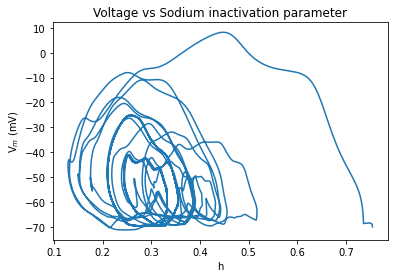

In [ ]:
%matplotlib inline
fig = pyplot.figure()
pyplot.plot(hvecMean, vvecMean, label="")
pyplot.xlabel('h')
pyplot.ylabel('V$_m$ (mV)')
pyplot.title('Voltage vs Sodium inactivation parameter')
fig.show()

No handles with labels found to put in legend.


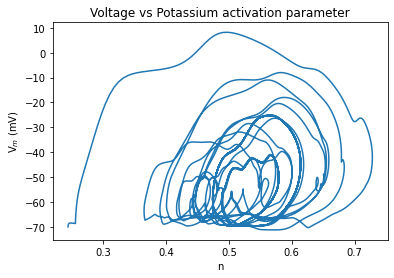

In [ ]:
fig = pyplot.figure()
pyplot.plot(nvecMean, vvecMean, label="")
pyplot.xlabel('n')
pyplot.ylabel('V$_m$ (mV)')
pyplot.title('Voltage vs Potassium activation parameter')
pyplot.legend(frameon=False)

In [ ]:
# output_learning_rate = 0.1
# epochs = 50
# import numpy as np

# for l in range(epochs):
#     M1_data = []
#     G1_data = []
#     for i in range(len(L1.sets)):
#         #output
#         #print(dir(i))
#         #M1 to M2 was connected here
#         #print(i.nc1.weight[0])
#         #is this even working?
#         out_1_1 = h.Vector().record(L1.sets[i].M1.axon(0.5)._ref_v)
#         out_1_2 = h.Vector().record(L1.sets[i].M2.dend(0.5)._ref_v)
#         #i.nc1.weight[0] += output_learning_rate * np.dot(list(out_1_1),list(out_1_2))
#         #M2 to M1 was connected here
#         out_2_1 = h.Vector().record(L1.sets[i].M2.axon(0.5)._ref_v)
#         out_2_2 = h.Vector().record(L1.sets[i].M1.dend(0.5)._ref_v)
#         #i.nc2.weight[0] += output_learning_rate * np.dot(list(out_2_1),list(out_2_2))
#         #M2 to G1 was connected here
#         out_3_1 = h.Vector().record(L1.sets[i].M2.axon(0.5)._ref_v)
#         out_3_2 = h.Vector().record(L1.sets[i].G1.dend(0.5)._ref_v)
#         #i.nc3.weight[0] += output_learning_rate * np.dot(list(out_3_1),list(out_3_2))
#         #G1 to M2
#         out_4_1 = h.Vector().record(L1.sets[i].G1.axon(0.5)._ref_v)
#         out_4_2 = h.Vector().record(L1.sets[i].M2.dend(0.5)._ref_v)
#         #i.nc4.weight[0] += output_learning_rate * np.dot(list(out_4_1),list(out_4_2))
#         #G1 to G2
#         out_5_1 = h.Vector().record(L1.sets[i].G1.axon(0.5)._ref_v)
#         out_5_2 = h.Vector().record(L1.sets[i].G2.dend(0.5)._ref_v)
#         #i.nc5.weight[0] += output_learning_rate * np.dot(list(out_5_1),list(out_5_2))    
#         #G2 to G1
#         out_6_1 = h.Vector().record(L1.sets[i].G2.axon(0.5)._ref_v)
#         out_6_2 = h.Vector().record(L1.sets[i].G1.dend(0.5)._ref_v)
#         #i.nc6.weight[0] += output_learning_rate * np.dot(list(out_6_1),list(out_6_2)) 
#         #G2 to M1 
#         out_7_1 = h.Vector().record(L1.sets[i].G2.axon(0.5)._ref_v)
#         out_7_2 = h.Vector().record(L1.sets[i].M1.dend(0.5)._ref_v)
#         #i.nc7.weight[0] += output_learning_rate * np.dot(list(out_7_1),list(out_7_2)) 
#         #M1 to G2
#         out_8_1 = h.Vector().record(L1.sets[i].M1.axon(0.5)._ref_v)
#         out_8_2 = h.Vector().record(L1.sets[i].G2.dend(0.5)._ref_v)
#         #i.nc8.weight[0] += output_learning_rate * np.dot(list(out_8_1),list(out_8_2)) 
#         #M1 to G1
#         out_9_1 = h.Vector().record(L1.sets[i].M1.axon(0.5)._ref_v)
#         out_9_2 = h.Vector().record(L1.sets[i].G1.dend(0.5)._ref_v)
#         #i.nc9.weight[0] += output_learning_rate * np.dot(list(out_9_1),list(out_9_2)) 
#         #G1 to M1
#         out_10_1 = h.Vector().record(L1.sets[i].G1.axon(0.5)._ref_v)
#         out_10_2 = h.Vector().record(L1.sets[i].M1.dend(0.5)._ref_v)
#         #i.nc10.weight[0] += output_learning_rate * np.dot(list(out_10_1),list(out_10_2)) 
#         t = h.Vector().record(h._ref_t)
#         # computations go brr
#         h.finitialize(-70 * mV)
#         h.continuerun(200 * ms)
#         #quick check that it werks
#         #print(list(out_1_1), list(out_1_2))
        
#         # time to add em
        
#         for k in range(1,11):
#             #if (k < 4 or k == 8 or k == 9):
#             #    exec(f"L1.sets[i].nc{k}.weight[0] += output_learning_rate * np.dot(list(out_{k}_1)/np.linalg.norm(list(out_{k}_1)),list(out_{k}_2)/np.linalg.norm(list(out_{k}_2)))")
#             #else:
#             #    exec(f"L1.sets[i].nc{k}.weight[0] -= output_learning_rate * np.dot(list(out_{k}_1)/np.linalg.norm(list(out_{k}_1)),list(out_{k}_2)/np.linalg.norm(list(out_{k}_2)))")
#             exec(f"L1.sets[i].nc{k}.weight[0] += output_learning_rate * np.dot(list(out_{k}_1)/np.linalg.norm(list(out_{k}_1)),list(out_{k}_2)/np.linalg.norm(list(out_{k}_2)))")
        
#         # just checking 
#         M1_data.append(list(out_1_1))
#         G1_data.append(list(out_5_1))
#         print(L1.sets[i].nc1.weight[0])
    
#     for i in range(len(L1.sets)-1):
#         exec(f"L1.nc11_{i}.weight[0] += output_learning_rate * np.dot(list(M1_data[i])/np.linalg.norm(list(M1_data[i])),list(M1_data[i+1])/np.linalg.norm(list(M1_data[i+1])))")
#         exec(f"L1.nc12_{i}.weight[0] += output_learning_rate * np.dot(list(M1_data[i+1])/np.linalg.norm(list(M1_data[i+1])),list(M1_data[i])/np.linalg.norm(list(M1_data[i])))")
#         exec(f"L1.nc13_{i}.weight[0] += output_learning_rate * np.dot(list(G1_data[i])/np.linalg.norm(list(G1_data[i])),list(G1_data[i+1])/np.linalg.norm(list(G1_data[i+1])))")
#         exec(f"L1.nc14_{i}.weight[0] += output_learning_rate * np.dot(list(G1_data[i+1])/np.linalg.norm(list(G1_data[i+1])),list(G1_data[i])/np.linalg.norm(list(G1_data[i])))")

In [ ]:
def generate_L_weight_delta(first, second):
    A_plus = 0.01
    A_minus = -0.01
    tau_pre =20*ms
    tau_post =20*ms
    delta_t = [(second[iter] - first[iter]) for iter in range(min(len(first),len(second)))]
    delta_w_list = [A_plus*math.exp(-delta_t[iter]/tau_post) if delta_t[iter] >=0.24 else A_minus*math.exp(delta_t[iter]/tau_pre) for iter in range(min(len(first),len(second)))]  
    delta_w = sum(delta_w_list)
    return delta_w

## Learning

In [ ]:
epochs=10
import numpy as np
import math
out_1_1_data = []


weights_rec = [[0 for i in range(epochs)] for j in range(len(L1.sets))]
weights_rec_2 = [[0 for i in range(epochs)] for j in range(len(L1.sets))]
L_weights_rec= [[0 for i in range(epochs)] for j in range(len(L1.sets)-1)]
L_weights_rec_2= [[0 for i in range(epochs)] for j in range(len(L1.sets)-1)]

for l in range(epochs):  
    print("\niteration no is",l)
    M1_data = []
    G1_data = []
    print("\nmutual learning")
    for i in range(len(L1.sets)):
        
        #M1 to M2 was connected here
        #print(i.nc1.weight[0])
        out_1_1 = h.Vector().record(L1.sets[i].M1.axon(0.5)._ref_v)
        out_1_2 = h.Vector().record(L1.sets[i].M2.dend(0.5)._ref_v)
        #i.nc1.weight[0] += output_learning_rate * np.dot(list(out_1_1),list(out_1_2))
        #M2 to M1 was connected here
        out_2_1 = h.Vector().record(L1.sets[i].M2.axon(0.5)._ref_v)
        out_2_2 = h.Vector().record(L1.sets[i].M1.dend(0.5)._ref_v)
        #i.nc2.weight[0] += output_learning_rate * np.dot(list(out_2_1),list(out_2_2))
        #M2 to G1 was connected here
        out_3_1 = h.Vector().record(L1.sets[i].M2.axon(0.5)._ref_v)
        out_3_2 = h.Vector().record(L1.sets[i].G1.dend(0.5)._ref_v)
        #i.nc3.weight[0] += output_learning_rate * np.dot(list(out_3_1),list(out_3_2))
        #G1 to M2
        out_4_1 = h.Vector().record(L1.sets[i].G1.axon(0.5)._ref_v)
        out_4_2 = h.Vector().record(L1.sets[i].M2.dend(0.5)._ref_v)
        #i.nc4.weight[0] += output_learning_rate * np.dot(list(out_4_1),list(out_4_2))
        #G1 to G2
        out_5_1 = h.Vector().record(L1.sets[i].G1.axon(0.5)._ref_v)
        out_5_2 = h.Vector().record(L1.sets[i].G2.dend(0.5)._ref_v)
        #i.nc5.weight[0] += output_learning_rate * np.dot(list(out_5_1),list(out_5_2))    
        #G2 to G1
        out_6_1 = h.Vector().record(L1.sets[i].G2.axon(0.5)._ref_v)
        out_6_2 = h.Vector().record(L1.sets[i].G1.dend(0.5)._ref_v)
        #i.nc6.weight[0] += output_learning_rate * np.dot(list(out_6_1),list(out_6_2)) 
        #G2 to M1 
        out_7_1 = h.Vector().record(L1.sets[i].G2.axon(0.5)._ref_v)
        out_7_2 = h.Vector().record(L1.sets[i].M1.dend(0.5)._ref_v)
        #i.nc7.weight[0] += output_learning_rate * np.dot(list(out_7_1),list(out_7_2)) 
        #M1 to G2
        out_8_1 = h.Vector().record(L1.sets[i].M1.axon(0.5)._ref_v)
        out_8_2 = h.Vector().record(L1.sets[i].G2.dend(0.5)._ref_v)
        #i.nc8.weight[0] += output_learning_rate * np.dot(list(out_8_1),list(out_8_2)) 
        #M1 to G1
        out_9_1 = h.Vector().record(L1.sets[i].M1.axon(0.5)._ref_v)
        out_9_2 = h.Vector().record(L1.sets[i].G1.dend(0.5)._ref_v)
        #i.nc9.weight[0] += output_learning_rate * np.dot(list(out_9_1),list(out_9_2)) 
        #G1 to M1
        out_10_1 = h.Vector().record(L1.sets[i].G1.axon(0.5)._ref_v)
        out_10_2 = h.Vector().record(L1.sets[i].M1.dend(0.5)._ref_v)
        #i.nc10.weight[0] += output_learning_rate * np.dot(list(out_10_1),list(out_10_2)) 

        spike_M1 = list(L1.sets[i].M1.spike_times)
        spike_M2 = list(L1.sets[i].M2.spike_times)
        spike_G1 = list(L1.sets[i].G1.spike_times)
        spike_G2 = list(L1.sets[i].G2.spike_times)

        t = h.Vector().record(h._ref_t)
        # computations go brr
        h.finitialize(-70 * mV)
        h.continuerun(200 * ms)
        # t = h.Vector().record(h._ref_t)
        # h.finitialize(-70 * mV)
        # h.continuerun(200 *ms)
        

        L1.sets[i].nc1.weight[0] += generate_L_weight_delta(spike_M1, spike_M2)
        L1.sets[i].nc2.weight[0] += generate_L_weight_delta(spike_M2, spike_M1)
        L1.sets[i].nc3.weight[0] += generate_L_weight_delta(spike_M2, spike_G1)
        L1.sets[i].nc4.weight[0] += generate_L_weight_delta(spike_G1, spike_M2)
        L1.sets[i].nc5.weight[0] += generate_L_weight_delta(spike_G1, spike_G2)
        L1.sets[i].nc6.weight[0] += generate_L_weight_delta(spike_G2, spike_G1)
        L1.sets[i].nc7.weight[0] += generate_L_weight_delta(spike_G2, spike_M1)
        L1.sets[i].nc8.weight[0] += generate_L_weight_delta(spike_M1, spike_G2)
        L1.sets[i].nc9.weight[0] += generate_L_weight_delta(spike_M1, spike_G1)
        L1.sets[i].nc10.weight[0] += generate_L_weight_delta(spike_G1, spike_M1)
        print("weight:", L1.sets[i].nc1.weight[0])
        weights_rec[i][l] = L1.sets[i].nc1.weight[0]
        weights_rec_2[i][l] = L1.sets[i].nc2.weight[0]    

# Lateral Learning
    print("\tlateral learning")
    for i in range(len(L1.sets)-1):
      h.finitialize(-70 * mV)
      h.continuerun(200 *ms)
      out_1_1 = h.Vector().record(L1.sets[i].M1.axon(0.5)._ref_v)
      print("Spike times P{0}".format(1+2*i), list(L1.sets[i].M1.spike_times))
      spike_1_1 = list(L1.sets[i].M1.spike_times)
      out_1_2 = h.Vector().record(L1.sets[i+1].M1.axon(0.5)._ref_v)
      print("Spike times P{0}".format(3+2*i), list(L1.sets[i+1].M1.spike_times))
      spike_1_2 = list(L1.sets[i+1].M1.spike_times)

      out_2_1 = h.Vector().record(L1.sets[i].G1.axon(0.5)._ref_v)
      print("Spike times P{0}".format(1+2*i), list(L1.sets[i].G1.spike_times))
      spike_2_1 = list(L1.sets[i].G1.spike_times)
      out_2_2 = h.Vector().record(L1.sets[i+1].G1.axon(0.5)._ref_v)
      print("Spike times P{0}".format(3+2*i), list(L1.sets[i+1].G1.spike_times))
      spike_2_2 = list(L1.sets[i+1].G1.spike_times)

    

      #change the deltas
      
      for i in range(len(L1.sets)-1):
         exec(f"L1.nc11_{i}.weight[0] += generate_L_weight_delta(spike_1_1, spike_1_2)")
         exec(f"L1.nc12_{i}.weight[0] += generate_L_weight_delta(spike_1_2, spike_1_1)")
         exec(f"L1.nc13_{i}.weight[0] += generate_L_weight_delta(spike_2_1, spike_2_2)")
         exec(f"L1.nc14_{i}.weight[0] += generate_L_weight_delta(spike_2_2, spike_2_1)")

    #Logging work

    # print(L1.netConArr[i][0].weight[0])
    # L_weights_rec[i][l] = L1.netConArr[i][0].weight[0]
    # L_weights_rec[i][l] = L1.netConArr[i][1].weight[0]


iteration no is 0

mutual learning
weight: 0.9358897194372545
weight: 0.8263426195550221
weight: 0.8661859321746221
weight: 0.6852614114671146
weight: 0.8212900318423723
	lateral learning
Spike times P1 [0.025000000100000003, 5.625000000100046, 13.675000000099757, 25.875000000099064, 37.275000000099915, 49.500000000102695, 61.70000000010547, 73.90000000010824, 86.10000000011101, 98.30000000011378, 110.55000000011657, 117.40000000011813, 122.80000000011935, 151.02500000009957, 163.17500000008852, 175.35000000007744, 187.52500000006637, 199.7000000000553]
Spike times P3 [0.025000000100000003, 5.625000000100046, 12.700000000099813, 13.675000000099757, 24.925000000099118, 36.30000000009969, 48.55000000010248, 60.77500000010526, 73.00000000010803, 85.22500000011081, 97.42500000011358, 109.67500000011637, 121.85000000011914, 130.80000000011796, 142.9750000001069, 155.15000000009582, 167.35000000008472, 179.55000000007362, 191.75000000006253]
Spike times P1 [0.025000000100000003]
Spike times

In [ ]:
recording_cell = L1.sets[2].G1
axon_g2 = h.Vector().record(recording_cell.axon(0.5)._ref_v)
dend_g2 = h.Vector().record(recording_cell.dend(0.5)._ref_v)
t = h.Vector().record(h._ref_t)

h.finitialize(-40 * mV)
h.continuerun(100 * ms)

f = plt2.figure(x_axis_label='t (ms)', y_axis_label='v (mV)')
f.line(t, list(axon_g2), line_width=1,legend_label='G1 axon',line_color='black')
f.line(t, list(dend_g2), line_width=2,legend_label='G1 dendrite',line_color='red', line_dash='dashed')
plt2.show(f)

In [ ]:
recording_cell = L1.sets[2].M1
axon_g2 = h.Vector().record(recording_cell.axon(0.5)._ref_v)
dend_g2 = h.Vector().record(recording_cell.dend(0.5)._ref_v)
t = h.Vector().record(h._ref_t)

h.finitialize(-40 * mV)
h.continuerun(300 * ms)

f = plt2.figure(x_axis_label='t (ms)', y_axis_label='v (mV)')
f.line(t, list(axon_g2), line_width=1,legend_label='M1 axon',line_color='black')
f.line(t, list(dend_g2), line_width=2,legend_label='M1 dendrite',line_color='red', line_dash='dashed')
plt2.show(f)

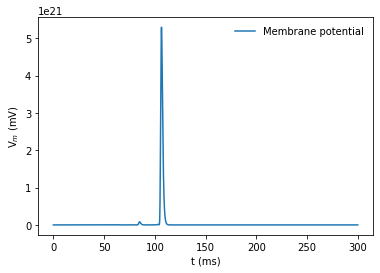

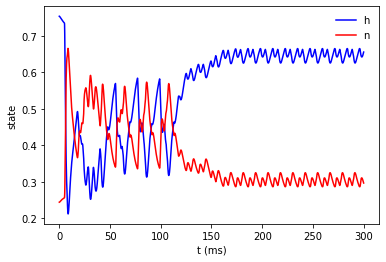

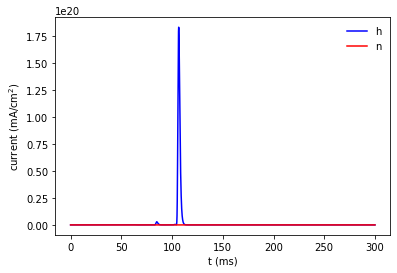

In [ ]:
import numpy as np
from matplotlib import pyplot

vvecAArr=[]
kvecAArr=[]
mvecAArr=[]
hvecAArr=[]
nvecAArr=[]
for i in L1.sets:
    for cell in i.cells:
        checkCell = cell.axon(0.5)
        vvecAArr.append(h.Vector().record(checkCell._ref_v))
        kvecAArr.append(h.Vector().record(checkCell.k_ion._ref_ik))
        # nvecA = h.Vector().record(checkCell.na_ion._ref_ina)
        mvecAArr.append(h.Vector().record(checkCell.hh._ref_m))
        hvecAArr.append(h.Vector().record(checkCell.hh._ref_h))
        nvecAArr.append(h.Vector().record(checkCell.hh._ref_n))

tvec = h.Vector().record(h._ref_t)

h.finitialize(-70)
h.continuerun(300)

vvecMean = np.mean(vvecAArr,axis=0)
hvecMean = np.mean(hvecAArr,axis=0)
nvecMean = np.mean(nvecAArr,axis=0)
kvecMean = np.mean(kvecAArr,axis=0)

fig = pyplot.figure()
pyplot.plot(tvec, vvecMean, label="Membrane potential")
pyplot.xlabel('t (ms)')
pyplot.ylabel('V$_m$ (mV)')
pyplot.legend(frameon=False)
pyplot.show()

fig = pyplot.figure()
pyplot.plot(tvec, hvecMean, '-b', label='h')
pyplot.plot(tvec, nvecMean, '-r', label='n')
pyplot.xlabel('t (ms)')
pyplot.ylabel('state')
pyplot.legend(frameon=False)
pyplot.show()

fig = pyplot.figure()
pyplot.plot(tvec, kvecMean, '-b', label='h')
pyplot.plot(tvec, nvecMean, '-r', label='n')
pyplot.xlabel('t (ms)')
pyplot.ylabel('current (mA/cm$^2$)')
pyplot.legend(frameon=False)
pyplot.show()

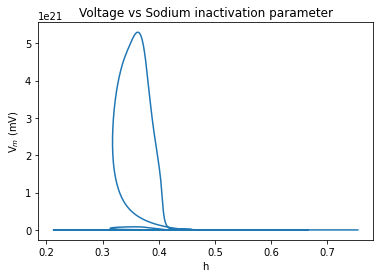

In [ ]:
%matplotlib inline
fig = pyplot.figure()
pyplot.plot(hvecMean, vvecMean, label="")
pyplot.xlabel('h')
pyplot.ylabel('V$_m$ (mV)')
pyplot.title('Voltage vs Sodium inactivation parameter')
fig.show()

No handles with labels found to put in legend.


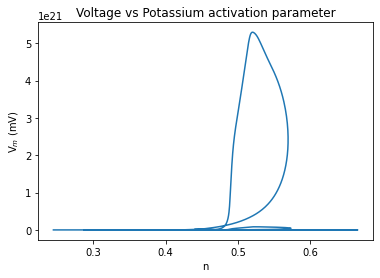

In [ ]:
fig = pyplot.figure()
pyplot.plot(nvecMean, vvecMean, label="")
pyplot.xlabel('n')
pyplot.ylabel('V$_m$ (mV)')
pyplot.title('Voltage vs Potassium activation parameter')
pyplot.legend(frameon=False)

In [ ]:
param = 2
for iter in range(param):
  exec(f"f{iter} = plt2.figure(x_axis_label='epoch', y_axis_label='weights')")
  exec(f"x = [i for i in range(len(weights_rec[0]))]")
  exec(f"f{iter}.line(x, weights_rec[0], line_width=1, legend_label='pair.no.1', line_color='black')")
  exec(f"plt2.show(f{iter})")

### Stage 10: Visualize the spike timing of each neuron in a set

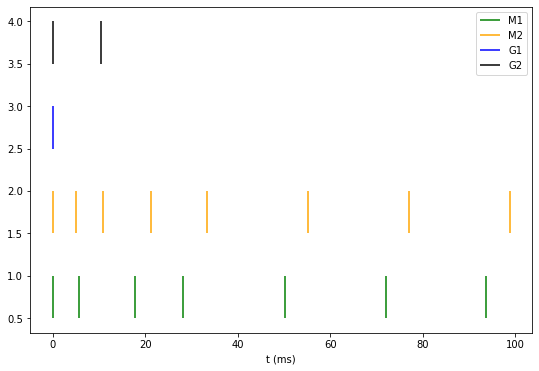

In [ ]:
color=['green','orange','blue','black']
label=['M1','M2','G1', 'G2']
plt1.figure(figsize=(9,6))
for i,cell in enumerate(L1.sets[2].cells):
    plt1.vlines(cell.spike_times, i + 0.5, i + 1,color=color[i],label=label[i])
plt1.xlabel('t (ms)')
plt1.legend()
plt1.show()

In [ ]:
#KNN
import numpy as np
import pandas as pd
df = pd.DataFrame([[1.3,1.4,2,2,1],[2.76,1.46,2.46,1.96,1],[4.6,2.1,4.5,1.3,0],[1.957,2.32,2.345,1.34,0],[2.4,2.2,2.6,1.5,0],[2.544,2.716,2.415,2.736,1],[1.317,2.053,2.616,2.4157,1],[1.215, 1.6852, 1.94, 1.25, 0],[1.934, 1.0598, 1.652, 1.349,1]])
df

0       1      2       3  4
0  1.300  1.4000  2.000  2.0000  1
1  2.760  1.4600  2.460  1.9600  1
2  4.600  2.1000  4.500  1.3000  0
3  1.957  2.3200  2.345  1.3400  0
4  2.400  2.2000  2.600  1.5000  0
5  2.544  2.7160  2.415  2.7360  1
6  1.317  2.0530  2.616  2.4157  1
7  1.215  1.6852  1.940  1.2500  0
8  1.934  1.0598  1.652  1.3490  1

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 

X = df.loc[:,:3] 
y = df.loc[:,4]
  
# Split into training and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=1)
  
knn = KNeighborsClassifier(n_neighbors=2) 
  
knn.fit(X_train, y_train) 
  
# Calculate the accuracy of the model 
print(knn.score(X_test, y_test)) 


0.75


In [ ]:
t = np.array(weights[0:4])
b = np.reshape(t,(1,-1))
print(list(knn.predict(b)))

[0]


In [ ]:
def KNN(weights):
    t = np.array(weights[0:4])
    b = np.reshape(t,(1,-1))
    #print(list(knn.predict(b)))
    return list(knn.predict(b))

In [ ]:
epoch = 0
while epoch != 1200:
    tr = KNN(weights[0:4])
    if tr == [1]:
        print('Weights modulated')
    print(tr)
    if tr == [0]:
        for i in range(0,len(weights[0:4])):
            weights[i] += 0.001
    else:
        break
    epoch += 1

[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


In [ ]:
print(weights)

[1.97061694 2.06581345 1.79501333 1.77298996 0.87392283 0.65748921
 0.69320168 0.58028436 0.83525883]
